In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
import scipy.stats as stats

##### Import claims_data.csv and cust_data.csv which is provided to you andcombine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claim = pd.read_csv('claims.csv')

In [3]:
demo = pd.read_csv('cust_demographics.csv')

In [4]:
df = pd.merge(left = claim, right = demo, left_on = 'customer_id', right_on = 'CUST_ID', how = 'right', indicator= True)

##### . Perform a data audit for the datatypes and find out if there are anymismatch within the current datatypes of the columns and their business significance.

In [7]:
df.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment', '_merge'],
      dtype='object')

In [56]:
df = df.loc[:,['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment']]

In [5]:
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'], format = '%d-%b-%y')
df.loc[df['DateOfBirth'].dt.year >= 2020, 'DateOfBirth'] -= pd.DateOffset(years=100)

In [10]:
df.dtypes

claim_id                      float64
customer_id                   float64
incident_cause                 object
claim_date                     object
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

##### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.



In [6]:
df['claim_amount'] = df.claim_amount.str.replace('$','')

In [7]:
df['claim_amount']=df.claim_amount.astype(float)

##### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [8]:
df['Flag'] = np.where(df.police_report == 'Unknown',0,1)
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge,Flag
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,both,1
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,both,0
2,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,both,1
3,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,both,1
4,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,both,1


##### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [34]:
dup_df = df.drop_duplicates(subset = ['customer_id'],keep = 'last')

##### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [35]:
df.isna().sum()

claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
Age                     0
Age_Group              42
Flag                    0
dtype: int64

In [67]:
#Categorical values
df['total_policy_claims']=df.total_policy_claims.fillna(df.total_policy_claims.mode())

#Continous values
df['claim_amount']=df.claim_amount.fillna(df.claim_amount.mean())


In [69]:
df['claim_amount'].isna().sum()

0

##### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
- Children < 18
- Youth 18-30
- Adult 30-60
- Senior > 60

In [79]:
current_date = pd.to_datetime('today')

In [80]:
df['Age'] = current_date.year - pd.DatetimeIndex(df['DateOfBirth']).year

In [81]:
df.loc[df['Age'] < 18,'Age_Group'] = 'Children'
df.loc[(df['Age'] > 18) & (df['Age'] < 30), 'Age_Group'] = 'Youth'
df.loc[(df['Age'] > 30) & (df['Age'] < 60), 'Age_Group'] = 'Adult'
df.loc[df['Age'] > 60,'Age_Group'] = 'Senior'

In [82]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_Group
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,42,Adult
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,51,Adult
2,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,37,Adult
3,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,37,Adult
4,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,35,Adult


##### 8. What is the average amount claimed by the customers from various segments?

In [22]:
df_segment_avgamount = df.groupby(by=['Segment'])[['claim_amount']].mean().add_prefix('Avg. amount claimed by the customers from various segments').reset_index()

In [54]:
df_segment_avgamount

,Segment,Avg. amount claimed by the customers from various segmentsclaim_amount
0,Gold,12852.189802
1,Platinum,12336.517291
2,Silver,12185.751562


##### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

##### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [61]:
df.loc[((df.State == 'TX') | (df.State == 'DE') | (df.State == 'AK')) & (df.incident_cause == 'Driver error') & (df.Age_Group == 'Adult'),['Age_Group']].count()


Age_Group    18
dtype: int64

##### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

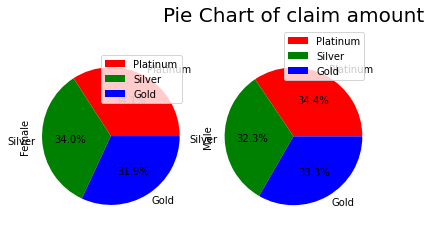

In [63]:
import matplotlib.pyplot as plt
claim = pd.pivot_table(df, index =['Segment'],columns ='gender',values ='claim_amount')


claim.plot(kind='pie', 
            labels=['Platinum','Silver','Gold'],
            colors=['r', 'g', 'b'],
            autopct='%.1f%%', # to get percentage and round off appropriately
            fontsize=10,
            subplots='true')

plt.title('Pie Chart of claim amount',fontsize=20)

plt.axis('equal')
plt.show()

##### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [65]:
issue = df.loc[df['incident_cause'].isin(['Driver error','Other driver error'])]
group_gender = issue.groupby(['gender'])['claim_amount'].sum()
group_gender.nlargest(1)

gender
Male    4.017650e+06
Name: claim_amount, dtype: float64

<AxesSubplot:xlabel='gender'>

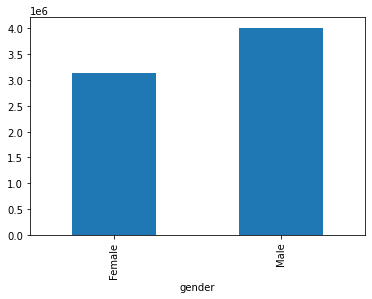

In [66]:
# Comparing using a bar chart
group_gender.plot(kind = 'bar')

##### As we can see from the above figure and the value we got, it is been clear that male has claimed the most for any type of driver related issues.

##### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


In [67]:
df_age_group = df.loc[df['fraudulent'] == 'Yes']

In [68]:
df_age_group = df_age_group.groupby(by = "Age_Group")[['total_policy_claims']].sum()

<AxesSubplot:xlabel='Age_Group'>

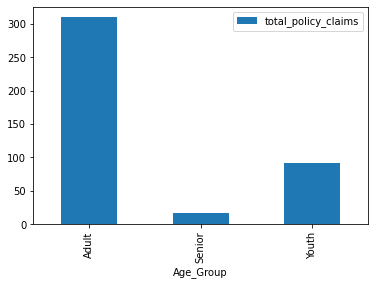

In [69]:
df_age_group.plot(kind='bar')

##### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

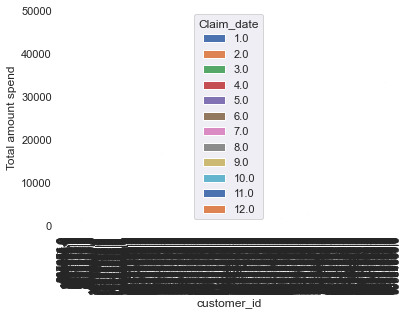

In [79]:
df['claim_date'] = pd.to_datetime(df['claim_date'])
df['Claim_date'] = df['claim_date'].dt.month
sns.set()
pd.pivot_table(df, index =['customer_id'],columns ='Claim_date',values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_Group,Flag,Claim_date
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,42,Adult,1,11.0
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,51,Adult,0,10.0
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,37,Adult,1,2.0
3,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,37,Adult,1,4.0
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,35,Adult,1,6.0


## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

##### 16. Is there any similarity in the amount claimed by males and females?

In [70]:
claim_male = df.loc[df.gender == 'Male','claim_amount']

In [71]:
claim_male.isna().sum()

0

In [72]:
claim_female = df.loc[df.gender == 'Female','claim_amount']

In [62]:
len(claim_male)

558

In [63]:
claim_female.mean()

12066.427278402001

In [64]:
claim_female.std()

13074.758911603298

##### Two Sample t-Test(Independent)
stats.ttest_ind(a=,b=) # 1. Two different assumptions : Amount Claimed by Males and Females have equal var # : unqual variance # 2. If t value is same in both the cases : variance in A and B is same # 3. If t value in different : var in A != var B : # consider the results from unequal variance H0 : Amount Claimed by Males == Amount Claimed By Females H1 : Amount Claimed by Males <> Amount Claimed by Females

In [73]:
stats.ttest_ind(a = claim_male, b = claim_female, equal_var = True)

Ttest_indResult(statistic=0.9737504539933243, pvalue=0.3303965009812033)

Significance Level @ 0.05

t value = 0.9737504539933243

p value = 0.3303965009812033

p value is greater than significance level

Accept Null

Sample 1 mean = Sample 2 Mean

"No statistical difference in the claim of Male and Female"

##### 17. Is there any relationship between age category and segment?

In [54]:
observed_table = pd.crosstab(df.Age_Group, df.Segment, margins=True)

In [58]:
observed_table

Segment,Gold,Platinum,Silver,All
Age_Group,,,,
Adult,280,259,248,787
Senior,6,15,9,30
Youth,74,80,79,233
All,360,354,336,1050


In [57]:
stats.chi2_contingency(observed = observed_table)

(5.500963921757585,
 0.7886366466609936,
 9,
 array([[ 269.82857143,  265.33142857,  251.84      ,  787.        ],
        [  10.28571429,   10.11428571,    9.6       ,   30.        ],
        [  79.88571429,   78.55428571,   74.56      ,  233.        ],
        [ 360.        ,  354.        ,  336.        , 1050.        ]]))

Significance Level @ 0.10

chi square value = 5.500963921757585

p value = 0.79

Dof = 9

p value is greater than significance level

Accept Null @ 90% Confidence

Sample 1 = Sample 2

"Age Group do not influences in what segnent a person falls into"

##### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was 10,000.

In [74]:
df.claim_amount.mean()

12467.681372549037

In [75]:
stats.ttest_1samp(a = df.claim_amount, popmean = 10000)

Ttest_1sampResult(statistic=6.121728469567326, pvalue=1.2892750350493153e-09)

Significance Level @ 0.05

t value = 6.121728469567326

p value = 1.2892750350493153e-09

p value is smaller than significance level

Accept Alternative

Population mean != Sample Mean

"The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average"

##### 19. Is there any difference between age groups and insurance claims?

#### F-Test/Anova


In [85]:
Age_Group1 = df.loc[df.Age_Group == 'Children' , "claim_amount"]
Age_Group2 = df.loc[df.Age_Group == 'Youth' , "claim_amount"]
Age_Group3 = df.loc[df.Age_Group == 'Adult' , "claim_amount"]
Age_Group4 = df.loc[df.Age_Group == 'Senior' , "claim_amount"]

In [87]:
print("The mean spend of Children : ", Age_Group1.mean())
print("The mean spend of Youth : ", Age_Group2.mean())
print("The mean spend of Adult : ", Age_Group3.mean())
print("The mean spend of Senior : ", Age_Group4.mean())

The mean spend of Children :  nan
The mean spend of Youth :  12058.10921063704
The mean spend of Adult :  12552.736371677018
The mean spend of Senior :  11320.374183006536


- Since Spend of Children is 0 so neglecting it for the anova test

In [90]:
stats.f_oneway(Age_Group2, Age_Group3, Age_Group4)

F_onewayResult(statistic=0.2280042979417878, pvalue=0.7961603568860682)

Significance Level @ 0.05

f value = 0.2280042979417878

p value = 0.7961603568860682

p value is greater than significance level

Fail to reject null

Sample 1 mean = Sample 2 Mean = Sample 3 Mean

"There is no difference between age groups and insurance claims"

### 20. Is there any relationship between total number of policy claims and the claimed amount?

##### Correlation

In [91]:
import matplotlib
from matplotlib import pyplot as plt

In [92]:
%matplotlib inline

In [93]:
import seaborn as sns

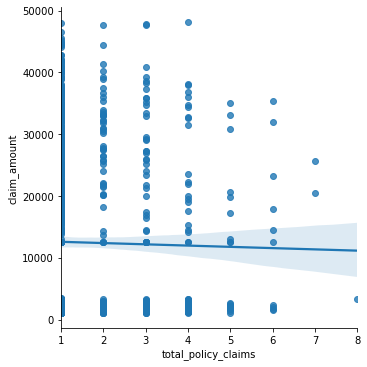

In [96]:
sns.lmplot(data=df, x = "claim_amount", y = "total_policy_claims")

In [97]:
np.corrcoef(df.claim_amount , df.total_policy_claims)

array([[ 1., nan],
       [nan, nan]])